

---
# MNIST Dataset Classification Task
## Charis Filis Academic-Id: 9449


### Import dependecies 

In [1]:
pip install -q -U keras-tuner


     |████████████████████████████████| 135 kB 9.0 MB/s 
     |████████████████████████████████| 1.6 MB 12.5 MB/s 


In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from keras.utils import np_utils
import keras_tuner as kt
import sympy
import numpy as np
import seaborn as sns
import collections
import time
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

### Data Preprocessing

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
n_classes = 10;
n_features = 784; # features are the pixels of each image
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))
print("Training data shape:",x_train.shape)
print("Training y train shape", y_train.shape)
print("Testing data shape:",x_test.shape)
x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

#Normalize to [0,1]
x_train, x_test = x_train/255, x_test/255
#One-hot encoding (to increase performance) - Encode Categorigal Data to one and zero
y_train, y_test = tf.one_hot(y_train, n_classes), tf.one_hot(y_test, n_classes)
# Flatten Dataset to vector in order to have proper input
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

11501568/11490434 [==============================] - 0s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000
Training data shape: (60000, 28, 28, 1)
Training y train shape (60000,)
Testing data shape: (10000, 28, 28, 1)


In [6]:
def model_builder():
    # Set Layers
    model_default = keras.Sequential()
    # # Input Layer
    model_default.add(layers.Flatten(input_shape=(n_features,)))
    # 1st hidden Layer
    model_default.add(layers.Dense(n_hidden_1,input_shape=(n_features,), activation='relu'))
    # 2nd hidden Layer
    model_default.add(layers.Dense(n_hidden_2,activation='relu'))
    # Output Layer
    model_default.add(layers.Dense((10),activation='softmax'))
    model_default.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    return model_default

## Case 1 online Training --- Batch_size = 1

In [7]:
model_default=model_builder()
model_default.summary()
start = time.time()
history = model_default.fit(x_train,y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48000/48000 [==============================] - 131s 3ms/step - loss: 0.6327 - accuracy: 0.8216 - val_loss: 0.4604 - val_accuracy: 0.9039
Epoch 2/100
48000/48000 [==============================] - 132s 3ms/step - loss: 0.4856 - accuracy: 0.9040 - val_loss: 0.4532 - val_accuracy: 0.9176
Epoch 3/100
48000/48000 [==============================] - 151s 3ms/step - loss: 0.4939 - accuracy: 0.9156 - val_loss: 0.4381 - val_accuracy: 0.9273
Epoch 4/100
48000/48000 [==============================] - 131s 3ms/step - loss: 0.5024 - accuracy: 0.9223 - val_loss: 0.4629 - val_accuracy: 0.9303
Epoch 5/100
48000/48000 [==============================] - 124s 3ms/step - loss: 0.5016 - accuracy: 0.9280 - val_loss: 0.4201 - val_accuracy: 0.9363
Epoch 6/100
48000/48000 [==============================] - 131s 3ms/step - loss: 0.4909 - accuracy: 0.9344 - val_loss: 0.5852 - val_accuracy: 0.9192
Epoch 7/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.4807 - accuracy: 0.9375 - val_loss:

###### Plot Results

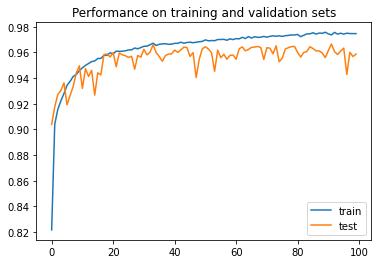

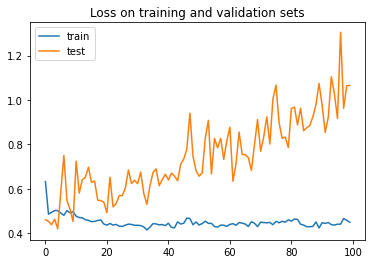

In [8]:
plt.figure(1)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Performance on training and validation sets')
plt.show()
plt.figure(2)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 2 - Minibatch Training with backpropagating grads


In [9]:
start = time.time()
history = model_default.fit(x_train,y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

Epoch 1/100
188/188 [==============================] - 2s 9ms/step - loss: 0.2721 - accuracy: 0.9831 - val_loss: 0.7539 - val_accuracy: 0.9671
Epoch 2/100
188/188 [==============================] - 1s 7ms/step - loss: 0.2282 - accuracy: 0.9848 - val_loss: 0.7379 - val_accuracy: 0.9668
Epoch 3/100
188/188 [==============================] - 1s 8ms/step - loss: 0.2086 - accuracy: 0.9849 - val_loss: 0.7120 - val_accuracy: 0.9665
Epoch 4/100
188/188 [==============================] - 2s 8ms/step - loss: 0.2008 - accuracy: 0.9845 - val_loss: 0.7503 - val_accuracy: 0.9647
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 0.1843 - accuracy: 0.9855 - val_loss: 0.7564 - val_accuracy: 0.9655
Epoch 6/100
188/188 [==============================] - 1s 7ms/step - loss: 0.1773 - accuracy: 0.9858 - val_loss: 0.7161 - val_accuracy: 0.9645
Epoch 7/100
188/188 [==============================] - 1s 7ms/step - loss: 0.1687 - accuracy: 0.9862 - val_loss: 0.7538 - val_accuracy: 0.9630

Plot Results

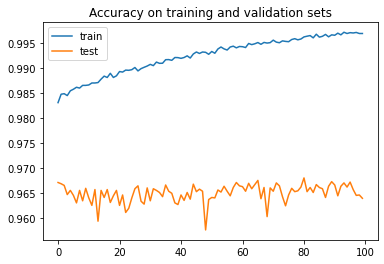

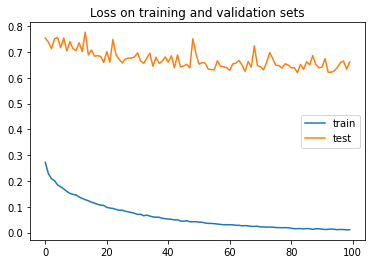

In [10]:
plt.figure(3)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(4)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 3 Batch Learning Batch_Size = Training Size

In [6]:
start = time.time()
Ntrain = 0.8*x_train.shape(1)
history = model_default.fit(x_train,y_train, epochs=100, batch_size=Ntrain, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

NameError: ignored

Plot Results

In [ ]:
plt.figure(5)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(6)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 4 RMSProp optimizer with ρ = 0.01

In [ ]:
model_default.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
tic = time.time()

history = model_default.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
toc = time.time()
print("Training tim: {}s".firnat(toc-tic))
plt.figure(7)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(8)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()